# Heat Equation - FEniCS - Gaussian Kernel Diffusion

### Proposed Heat Equation

\begin{equation}
    \begin{cases}
    u_{t} = u_{xx} + u_{yy}, \quad \quad (x,y) \in \Omega \\
    u' = 0, \quad\quad\quad\quad\quad\quad (x,y) \in \partial \Omega\\
    \end{cases}
\end{equation}
#### Initial Conditions
\begin{equation}
        U(x,y,0) =  {e}^ {-\frac{(x-0.5)^2+(y-0.5)^2}{2 \sigma^2}}, \quad \sigma^2 = 0.01
\end{equation}

In [ ]:
from fenics import *
import numpy as np

T = 0.001           # final time
num_steps = 10     # number of time steps
dt = T / num_steps # time step size


# Create mesh and define function space
nx = ny = 250
mesh = UnitSquareMesh(nx, ny)
V = FunctionSpace(mesh, "Lagrange", 3)

# Define boundary condition, t value can be modified later
u_D = Expression('exp(-(pow((x[0]-0.5),2) + pow((x[1]-0.5),2))/(2*0.01))', degree=3, t=0)

# Define initial value
u_n = interpolate(u_D, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)
vtkfile = File('heateqn_gaussian/solution.pvd')

# Time-stepping
u = Function(V)
t = 0
for n in range(num_steps):

    # Update current time
    t += dt
    u_D.t = t

    # Compute solution
    solve(a == L, u)

    # Compute error using analytical solution
    u_e = interpolate(u_D, V)

    # Save results
    
    vtkfile << (u, t)
    
    # Update previous solution
    u_n.assign(u)

# Hold plot


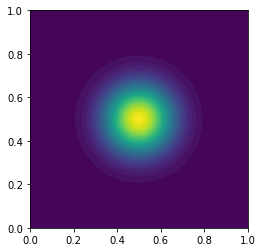

In [10]:
plot(u)

nx = 200 dt = 0.01. V= lagrange, 2
t = 0.010: max error = 0.01427961251
t = 0.020: max error = 0.02364727996
t = 0.030: max error = 0.02937095117
t = 0.040: max error = 0.03242747069
t = 0.050: max error = 0.03356527272
t = 0.060: max error = 0.03335410406
t = 0.070: max error = 0.03222438825
t = 0.080: max error = 0.03049832568
t = 0.090: max error = 0.02841441008
t = 0.100: max error = 0.02614670757

t = 0.020: max error = 0.04313137585
t = 0.040: max error = 0.05998633333
t = 0.060: max error = 0.06259099831
t = 0.080: max error = 0.05807082749
t = 0.100: max error = 0.05052593082
t = 0.120: max error = 0.04221633388
t = 0.140: max error = 0.03430446175
t = 0.160: max error = 0.02731516778
t = 0.180: max error = 0.02141683679
t = 0.200: max error = 0.01659009678